# Set up

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from underthesea import word_tokenize
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

## Module

In [22]:
def encoder(sentence):
    words=word_tokenize(sentence)
    onehot_vector=np.zeros(len(dictionary))
    for w in words:
        for i,word in enumerate(dictionary):
            if word==w:
                onehot_vector[i]+=1
    return onehot_vector

## Load and analyze assets

In [23]:
with open('dictionary.txt', 'r') as f:
    dictionary = [line.rstrip('\n') for line in f]

In [24]:
df = pd.read_csv('data.csv')

In [25]:
df['khach_cmt'] = df['khach_cmt'].astype(str)
df['rating'] = df['rating'].astype(int)
df.duplicated().value_counts()

False    19897
dtype: int64

In [26]:
df = df[['khach_cmt', 'rating', 'shop',	'dvvc',	'sp']]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19897 entries, 0 to 19896
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   khach_cmt  19897 non-null  object
 1   rating     19897 non-null  int64 
 2   shop       19897 non-null  int64 
 3   dvvc       19897 non-null  int64 
 4   sp         19897 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 777.4+ KB


# Prepare Data

In [28]:
df["encode"] = df.apply(lambda row: encoder(row['khach_cmt']), axis=1)

In [29]:
df['rating'] = df['rating'].replace(4, 5)
df['rating'] = df['rating'].replace(2, 1)
df['rating'].value_counts()

5    8267
1    6630
3    5000
Name: rating, dtype: int64

In [30]:
df.head()

,khach_cmt,rating,shop,dvvc,sp,encode
0,lần trước đặt hai chiếc quần lại giao một chiế...,1,0,1,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"quần mới mặc 1 tiếng bị sức dây tia rồi , vải ...",1,0,0,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,quần ngủ nam mà lại 1 túi quần vải bóng màu tí...,1,1,0,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,vừa giặt đã bị xù. Quần dễ bám bụi chất vải kh...,1,0,0,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,chả hiểu quần áo có cái gì mà mang đi giặt xon...,1,0,0,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [31]:
X = np.array(df['encode'].to_list())
y = np.array(df['rating'].to_list())

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15917, 6158), (3980, 6158), (15917,), (3980,))

# Model

In [34]:
def evaluation_model(model,X_train,X_test,y_train,y_test):
  y_pred=model.predict(X_train)
  print("accuracy score of train set: {:.2f}".format(accuracy_score(y_train,y_pred)))
  # plot
  plt.figure(figsize=(8,6))
  sns.heatmap(confusion_matrix(y_train,y_pred),cmap="YlGnBu")
  plt.show()

  print("\n===========================\n")

  y_pred=model.predict(X_test)
  print("accuracy score of test set: {:.2f}".format(accuracy_score(y_test,y_pred)))
  confusion_matrix(y_test,y_pred)
  # plot
  plt.figure(figsize=(8,6))
  sns.heatmap(confusion_matrix(y_test,y_pred),cmap="YlGnBu")
  plt.show()

## KNeighborsClassifier

In [35]:
# modelKNN = KNeighborsClassifier(n_neighbors=5)
# modelKNN.fit(X_train,y_train)

In [36]:
# evaluation_model(modelKNN,X_train,X_test,y_train,y_test)

## DecisionTreeClassifier

In [37]:
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train,y_train)

DecisionTreeClassifier()

accuracy score of train set: 0.98


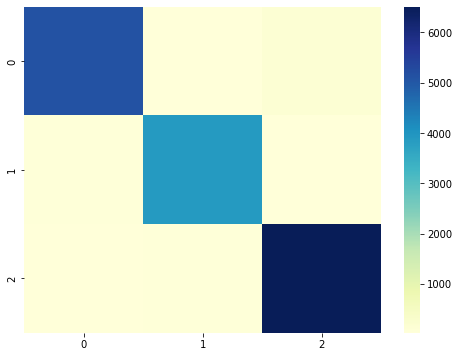



accuracy score of test set: 0.67


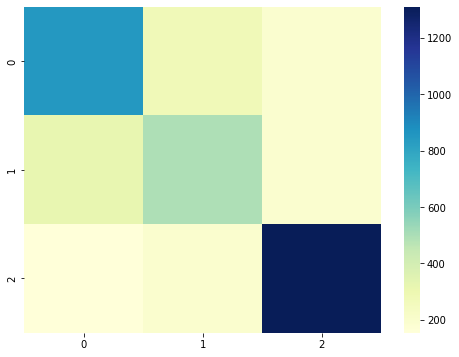

In [38]:
evaluation_model(modelDT,X_train,X_test,y_train,y_test)

## RandomForestClassifier

In [39]:
# modelRF = RandomForestClassifier()
# modelRF.fit(X_train,y_train)

In [40]:
# evaluation_model(modelRF,X_train,X_test,y_train,y_test)

## Deep Neural Network

*Small dataset, Free server with weak configuration --> inefficient*

# Conclusion

In [41]:
def doan_xem(model,comment):
  return model.predict(encoder(comment).reshape(1,-1))


1.   modelKNN
2.   modelDT
3.   modelRF



In [42]:
# cmt = 'lần trước đặt hai chiếc quần lại giao một chiếc, buồn và chán shop, shipper thái độ với khách hàng nữa chứ'
# print('rating: {}'.format(doan_xem(modelKNN,cmt)[0]))
# print('rating: {}'.format(doan_xem(modelRF,cmt)[0]))
# print('rating: {}'.format(doan_xem(modelDT,cmt)[0]))

In [43]:
# pickle.dump(modelKNN, open('knn.txt', 'wb'))  

In [44]:
pickle.dump(modelDT, open('dt_rt.txt', 'wb'))  

In [45]:
# pickle.dump(modelRF, open('rf_rt.txt', 'wb'))  